# 3104 Assignment 1
### [30 Marks, 20%]

Group Name : Jarvis

Members:

- Alisha Thomas (C0872330) 
- Mohibkhan Pathan (C0894975) 
- Prajina Rajkarnikar (C0906293) 
- Umesh Khatiwada (C0893975)

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.manifold import TSNE
from sklearn.ensemble import GradientBoostingRegressor


# You may need some sklearn specific imports, or other standard toolboxes

## Load dataset

In [2]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

## Split data

The procedure involves providing original 2D pictures and one-hot encoded labels for classification tasks in order to prepare data for machine learning models, such as neural networks.

In [3]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48


#This line extracts the image data from the training set. 
#It takes the first 2304 elements of each sample (assuming n_inputs is 2304).
x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
#This line extracts the label data from the training set. It takes the next 7 elements of each sample (assuming n_classes is 7).
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding


#reshapes the training images. Here, x_training.shape[0] is the number of training samples.
x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

The function get_emotion takes an image's predicted emotion array, emotion, and returns the corresponding emotion as a string.

In [4]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


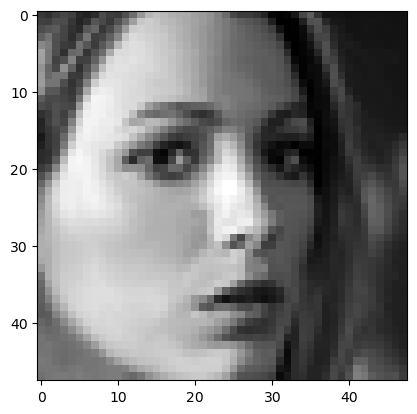

facial emotion: fear


In [5]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)
#selects an index between 0 and 999 randomly
sampleindex = np.random.randint(0,1000)
#randomly extracts the image at selected index from the training set.
sample = x_training[sampleindex, :]
#Reshapes the flat array back into a 48x48 2D image array.
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

# For this problem
To do binary classification problem for categorizing faces as happy or sad or to load the data from sample that includes only the happy or sad cases:
step 1: extract all the images and labels corresponding to happy and sad classes

step 2: converting the one-hot encoded labels for happy and sad into binary labels

Training data shape (images): (12045, 48, 48)
Training data shape (labels): (12045,)
Testing data shape (images): (1548, 48, 48)
Testing data shape (labels): (1548,)


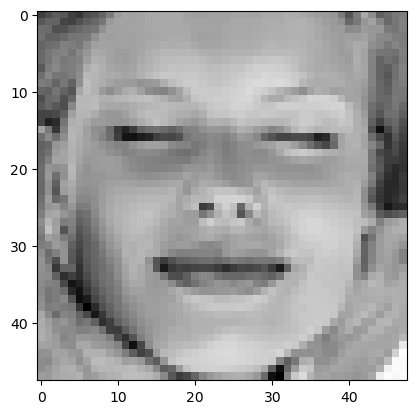

Facial emotion: happy


In [6]:
# YOUR CODE HERE
# Function to filter the data for happy and sad labels
happy_index = 3
sad_index = 4

def filter_happy_sad(x_data, y_data):
    happy_sad_mask = (np.argmax(y_data, axis=1) == happy_index) | (np.argmax(y_data, axis=1) == sad_index)
    x_filtered = x_data[happy_sad_mask]
    y_filtered = y_data[happy_sad_mask]

    # Convert one-hot encoded labels to binary labels
    y_filtered = np.argmax(y_filtered, axis=1)
    y_filtered = (y_filtered == happy_index).astype(int)  # 1 for happy, 0 for sad

    return x_filtered, y_filtered

# Filter training and testing data
x_train_happy_sad, y_train_happy_sad = filter_happy_sad(x_training, y_training)
x_test_happy_sad, y_test_happy_sad = filter_happy_sad(x_testing, y_testing)

# Print shapes of the filtered datasets
print("Training data shape (images):", x_train_happy_sad.shape)
print("Training data shape (labels):", y_train_happy_sad.shape)
print("Testing data shape (images):", x_test_happy_sad.shape)
print("Testing data shape (labels):", y_test_happy_sad.shape)

# Display a random sample from the filtered training set
sampleindex = np.random.randint(0, x_train_happy_sad.shape[0])
sample = x_train_happy_sad[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('Facial emotion:', 'happy' if y_train_happy_sad[sampleindex] == 1 else 'sad')

[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

Applying PCA and LDA

PCA: Reduce the dimensionality of the data.

LDA: Transform the data to a new space that maximizes class separability.

Reshaping the training images (x_train_happy_sad) and testing images (x_test_happy_sad) to flattened arrays is required in order for PCA and LDA to efficiently process the pixel intensities as numerical characteristics across several samples.


In [7]:
# reshaping training and testing images
n_samples, img_height, img_width = x_train_happy_sad.shape
x_train_flat = x_train_happy_sad.reshape(n_samples, -1)
x_test_flat = x_test_happy_sad.reshape(x_test_happy_sad.shape[0], -1)

To lower the dimensionality of the training pictures that have been flattened (x_train_flat), PCA is used. The number of main components to retain is indicated by n_components_pca.

In [8]:
# Applying PCA to training and test images
n_components_pca = 50  # Number of components to keep
pca = PCA(n_components=n_components_pca)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

After PCA-transformed data (x_train_pca), LDA is employed to further decrease dimensions to n_components=1. To optimize class separability, LDA is supervised and takes into account class labels (y_train_happy_sad).

In [9]:
# Applying LDA to training and test images
lda = LDA(n_components=1)  # Number of components to keep
x_train_lda = lda.fit_transform(x_train_pca, y_train_happy_sad)
x_test_lda = lda.transform(x_test_pca)

Displaying a given number (num samples) of samples from various datasets (original pictures, PCA-transformed images, or LDA-transformed values) is the purpose of this function.

In [10]:
#The function creates titles, x-labels, and y-labels, displays data as a line plot with markers and lines, 
# modifies the y-axis boundaries, and outputs grayscale photographs of the data.
def display_samples(data, title, num_samples=5, is_lda=False):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    fig.suptitle(title, fontsize=16)
    for i in range(num_samples):
        ax = axes[i]
        if is_lda:
            # plotting the LDA transformed data
            ax.plot(data[i], marker='o', linestyle='-', markersize=4)  
            ax.set_ylim([data.min() - 1, data.max() + 1])
            ax.set_title(f'Sample {i+1}', fontsize=12)
            ax.set_xlabel('LDA Component', fontsize=10)
            ax.set_ylabel('Transformed Value', fontsize=10)
        else:
            ax.imshow(data[i].reshape(48, 48), cmap='gray')
            ax.set_title(f'Sample {i+1}', fontsize=12)
        ax.axis('off' if not is_lda else 'on')
        if is_lda:
            ax.set_yticks([])
            ax.set_xticks([])
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


In [11]:
# Rebuilding pictures (x_train_pca_inv) from PCA-transformed data (x_train_pca) using pca.inverse_transform.
# returning the inversely converted data's shape to a 48x48 picture.
x_train_pca_inv = pca.inverse_transform(x_train_pca)
x_train_pca_inv = x_train_pca_inv.reshape(-1, 48, 48)

"Original Happy/Sad Faces" is the title of the original photos (x_train_happy_sad).
Images (x_train_pca_inv) with PCA transformations labeled 'PCA Transformed Faces'.
'LDA Transformed Faces', a term for LDA-transformed variables (x_train_lda) with is_lda=True.

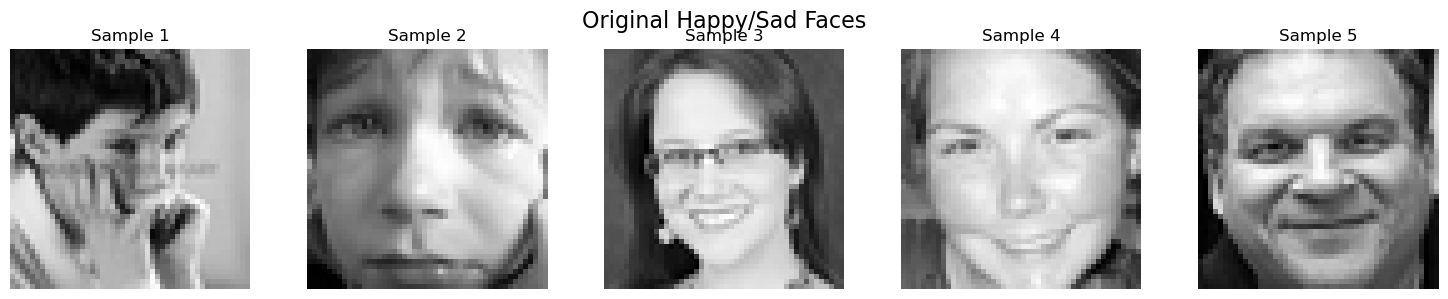

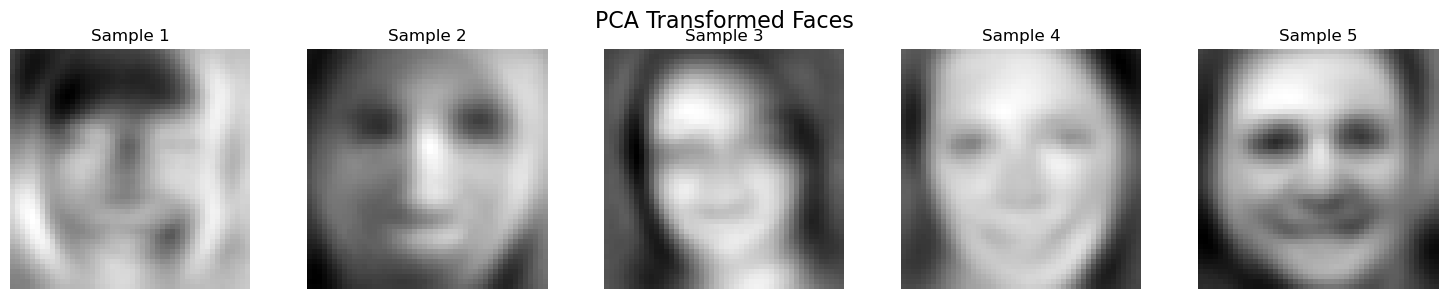

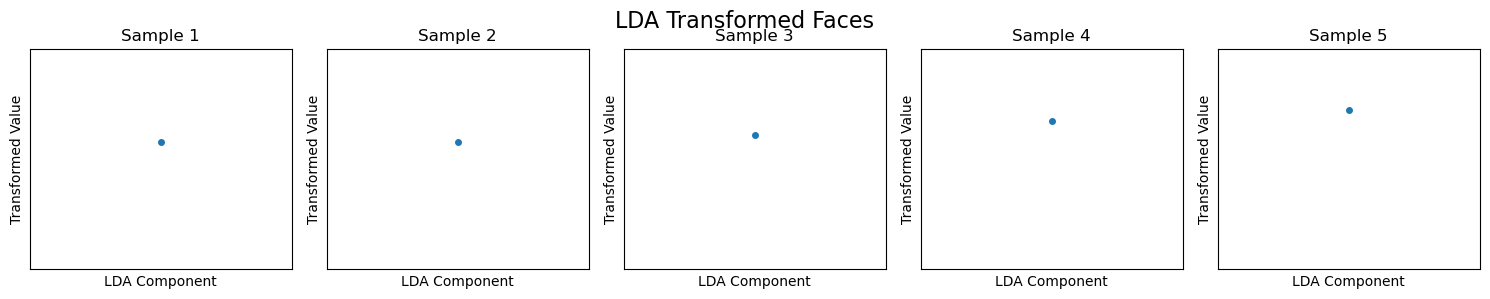

In [12]:
# Display original, PCA, and LDA transformed samples
display_samples(x_train_happy_sad, 'Original Happy/Sad Faces')
display_samples(x_train_pca_inv, 'PCA Transformed Faces')
display_samples(x_train_lda, 'LDA Transformed Faces', is_lda=True)

[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [13]:
# YOUR CODE HERE
# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(x_train_happy_sad.reshape(-1, 48 * 48), y_train_happy_sad)

# Predict on the test data
y_pred = nb_classifier.predict(x_test_happy_sad.reshape(-1, 48 * 48))

# Calculate accuracy
accuracy = accuracy_score(y_test_happy_sad, y_pred)

print(f'Naive Bayes Classifier Accuracy: {accuracy * 100:.2f}%')

Naive Bayes Classifier Accuracy: 59.04%


[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

In [14]:
# YOUR CODE HERE
# Scale the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

# Initialize Logistic Regression classifier with increased max_iter and solver
lr_classifier = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

# Train the classifier on the scaled data
lr_classifier.fit(x_train_scaled, y_train_happy_sad)

# Predict on the test data
y_pred = lr_classifier.predict(x_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test_happy_sad, y_pred)

print(f'Logistic Regression Classifier Accuracy: {accuracy * 100:.2f}%')

Logistic Regression Classifier Accuracy: 66.86%


[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

In [15]:
# YOUR CODE HERE
# Scale the data using StandardScaler within a pipeline
svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))

# Train the SVM classifier
svm_pipeline.fit(x_train_flat, y_train_happy_sad)

# Predict on the test data
y_pred = svm_pipeline.predict(x_test_flat)

# Calculate accuracy
accuracy = accuracy_score(y_test_happy_sad, y_pred)

print(f'Support Vector Machine Classifier Accuracy: {accuracy * 100:.2f}%')

Support Vector Machine Classifier Accuracy: 74.48%


[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

YOUR ANSWER HERE

For binary classification based on facial expressions, performance factors including accuracy, interpretability, robustness, scalability, and feature significance choose which neural network model to use: Naive Bayes, Logistic Regression, or Support Vector Machine (SVM). SVMs are quicker and more efficient in high-dimensional spaces, although Naive Bayes and Logistic Regression perform better in terms of accuracy, precision, recall, and F1-score. The feature significance coefficients of Logistic Regression shed light on the behavior of the model.


For binary classification applications, logistic regression makes sense because of its high accuracy, interpretability, and simplicity of use. The ideal approach, however, is contingent upon the properties of the dataset, interpretability, available computing power, and the intended trade-off between complexity and performance. For best outcomes, experimentation, hyperparameter optimization, and performance measurements are advised.

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

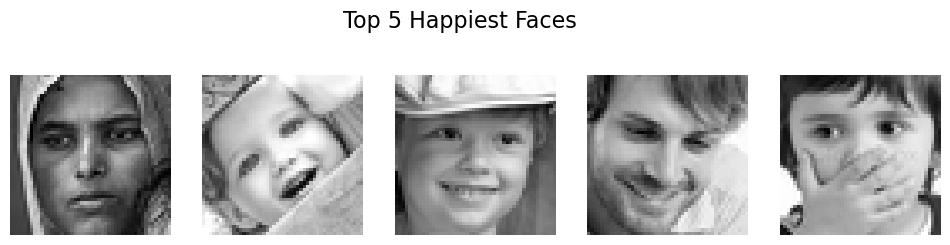

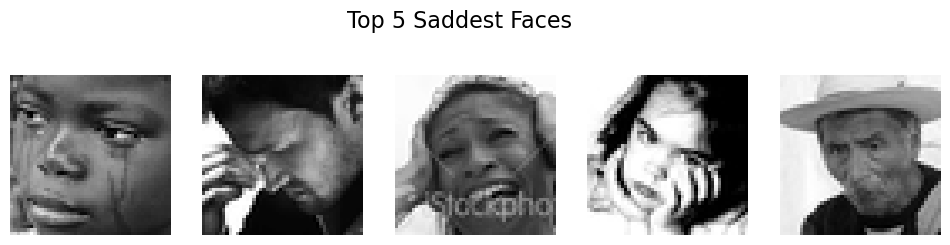

In [16]:
# YOUR CODE HERE
# Predict probabilities for the test set
y_prob = lr_classifier.predict_proba(x_test_flat)[:, 1]  # Probabilities of being in class 1 (happy)

# Sort indices based on probabilities
sorted_indices = np.argsort(y_prob)

# Get indices of the happiest and saddest faces
happiest_indices = sorted_indices[-5:][::-1]  # 5 faces with highest probabilities
saddest_indices = sorted_indices[:5]  # 5 faces with lowest probabilities

# Function to display faces
def display_faces(images, title):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 3))
    fig.suptitle(title, fontsize=16)
    for i, (image, ax) in enumerate(zip(images, axes)):
        ax.imshow(image.reshape(48, 48), cmap='gray')
        ax.axis('off')

# Display happiest faces
happiest_faces = x_test_happy_sad[happiest_indices]
display_faces(happiest_faces, 'Top 5 Happiest Faces')

# Display saddest faces
saddest_faces = x_test_happy_sad[saddest_indices]
display_faces(saddest_faces, 'Top 5 Saddest Faces')

plt.show()

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

In [17]:
#Copy the datasets to avoid overwriting the originals
trainingset2 = trainingset.copy()
testingset2 = testingset.copy()

# Extract features and labels for training set
x_train_multi = trainingset2[:, 0:2304]  # Assuming the first 2304 elements are image features
y_train_multi = trainingset2[:, 2304:4608]  # Assuming the next 2304 elements are one-hot encoded labels

# Extract features and labels for testing set
x_test_multi = testingset2[:, 0:2304]  # Assuming the first 2304 elements are image features
y_test_multi = testingset2[:, 2304:4608]  # Assuming the next 2304 elements are one-hot encoded labels

# Convert one-hot encoded labels to single labels using get_emotion function
y_train_multi = np.array(list(map(get_emotion, y_train_multi)))
y_test_multi = np.array(list(map(get_emotion, y_test_multi)))


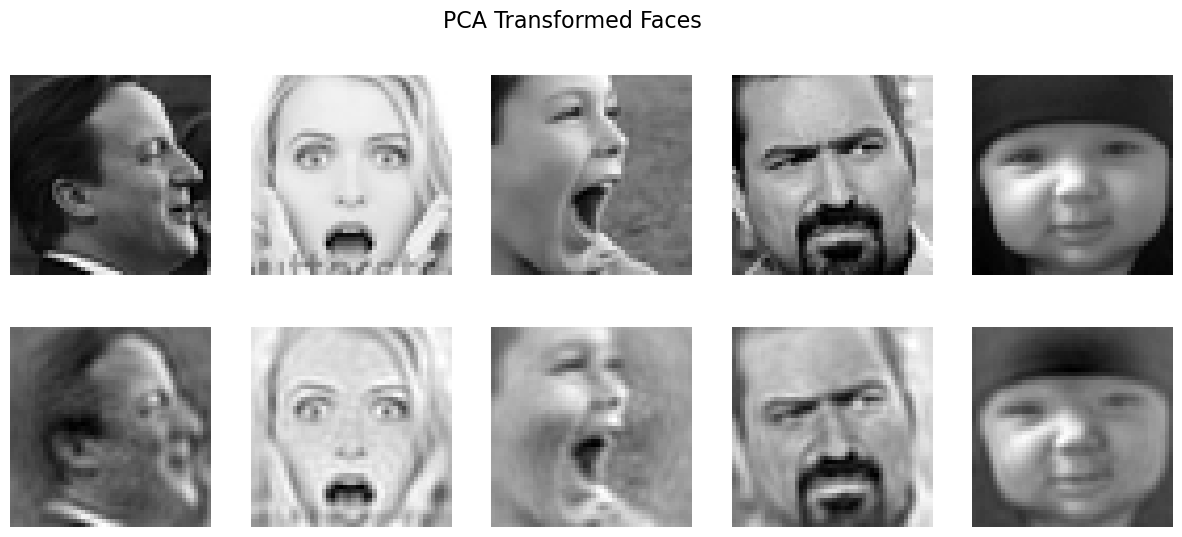

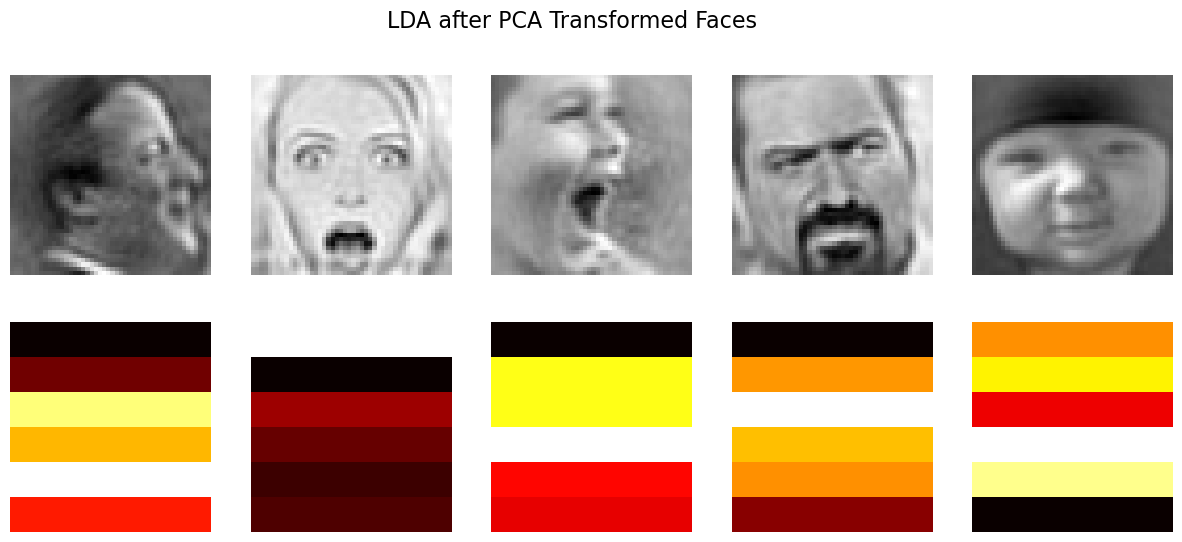

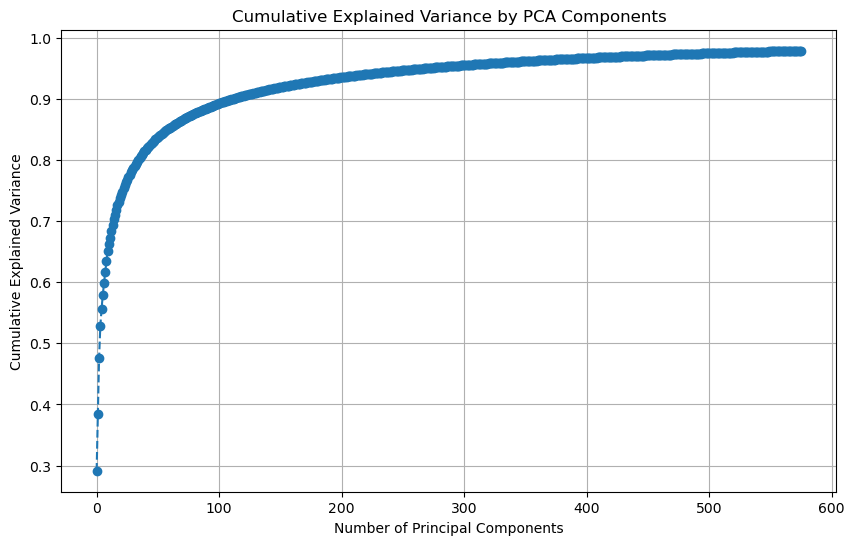

In [18]:
# Flatten the images for PCA and LDA
x_train_flat = x_training.reshape(x_training.shape[0], -1)
x_test_flat = x_testing.reshape(x_testing.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
x_train_flat_scaled = scaler.fit_transform(x_train_flat)
x_test_flat_scaled = scaler.transform(x_test_flat)

# Apply PCA
pca = PCA(n_components=576)  # Adjust n_components as needed
x_train_pca = pca.fit_transform(x_train_flat_scaled)
x_test_pca = pca.transform(x_test_flat_scaled)

# Apply LDA on PCA-transformed data
lda = LDA(n_components=6)  # LDA requires n_classes - 1 components for multi-class classification
x_train_lda = lda.fit_transform(x_train_pca, np.argmax(y_training, axis=1))
x_test_lda = lda.transform(x_test_pca)

# Function to display original and transformed images
def display_samples(original_images, transformed_images, title, is_lda=False, num_samples=5):
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 6))
    fig.suptitle(title, fontsize=16)
    for i in range(num_samples):
        ax = axes[0, i]
        ax.imshow(original_images[i].reshape(48, 48), cmap='gray')
        ax.axis('off')
        
        ax = axes[1, i]
        if is_lda:
            # Visualizing the LDA transformed data using a heatmap representation
            transformed_image = transformed_images[i].reshape(-1, 1)
            ax.imshow(transformed_image, cmap='hot', aspect='auto')
        else:
            ax.imshow(transformed_images[i].reshape(48, 48), cmap='gray')
        ax.axis('off')
    plt.show()

# Select a few samples to display
sample_indices = np.random.randint(0, x_train_flat.shape[0], 5)
sample_originals = x_train_flat[sample_indices]
sample_pca = pca.inverse_transform(x_train_pca[sample_indices])
sample_lda = x_train_lda[sample_indices]

# Display the results
display_samples(sample_originals, sample_pca, 'PCA Transformed Faces')
display_samples(sample_pca, sample_lda, 'LDA after PCA Transformed Faces', is_lda=True)

# Plot cumulative variance for PCA
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

def plot_cumulative_variance(cumulative_variance, title):
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_variance, marker='o', linestyle='--')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_cumulative_variance(cumulative_variance, 'Cumulative Explained Variance by PCA Components')

[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
# GNB = GaussianNB()

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_multi, y_train_multi)

# Predict on the test set
y_pred = nb_classifier.predict(x_test_multi)

# Calculate accuracy
accuracy = accuracy_score(y_test_multi, y_pred)
print(f"Accuracy of Naive Bayes classifier: {accuracy:.4f}")

Accuracy of Naive Bayes classifier: 0.2276


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

Accuracy of Naive Bayes classifier: 0.2276


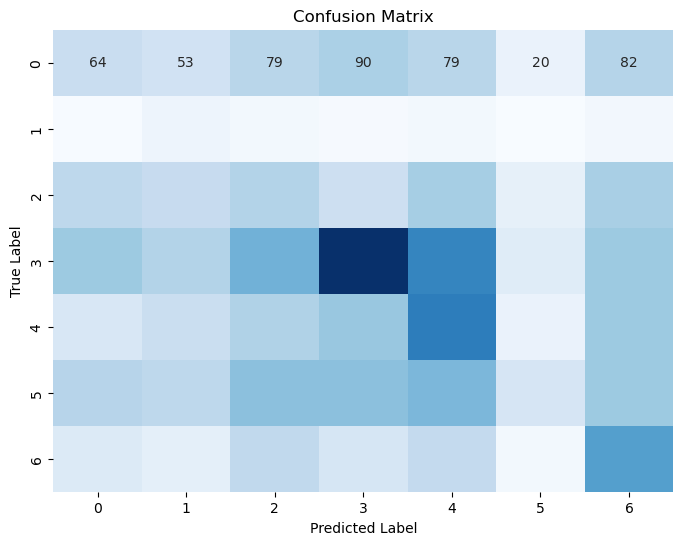

In [21]:
import seaborn as sns
# Initialize and train Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_multi, y_train_multi)

# Predict on the test set
y_pred = nb_classifier.predict(x_test_multi)

# Calculate accuracy
accuracy = accuracy_score(y_test_multi, y_pred)
print(f"Accuracy of Naive Bayes classifier: {accuracy:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_multi, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


An explanation of the confusion matrix

Interpretation:
Seven emotion classes were used to test the Naive Bayes classifier: angry, disgusted, fearful, pleased, sad, surprised, and neutral. Although the classifier frequently misclassified occurrences as fear, sorrow, or neutral, it correctly predicted 64 instances of rage. Moreover, disgust faces were mistakenly identified as neutral, fearful, angry, and sorrowful. Anger, contempt, sadness, and neutral expressions were mistakenly assigned to fear faces, suggesting overlap with other unfavorable emotions. Although the most accurate predictions were made for happy smiles, the most common misclassifications were for anger, disgust, fear, sadness, surprise, and neutral faces. Anger, contempt, fear, and neutral were incorrectly assigned to sad expressions, indicating overlap with other negative emotions. Misclassified surprise expressions included fear, happiness, and neutrality, suggesting that it is difficult to separate surprise from other emotions. Anger, fear, sadness, and surprise were incorrectly identified as neutral expressions, showing overlap with other emotions.

Conclusion:

The Naive Bayes classifier suffers with surprise and disgust, but excels at identifying pleasant faces, according to the confusion matrix. It commonly incorrectly categorizes emotions that share facial expressions, such as fear, sadness, and anger, suggesting difficulties in differentiating between these feelings. The task's complexity is shown by the total accuracy of 22.76%, which calls for more sophisticated models or new characteristics to increase accuracy, particularly for emotions with high misclassification rates like surprise and disgust.

This comprehensive review highlights the advantages and disadvantages of the Naive Bayes classifier for emotion classification from facial expressions and offers insights into how it performs across various emotion classes based on the confusion matrix.

[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [22]:
# Train Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=20)
logreg_classifier.fit(x_train_multi, y_train_multi)

# Predict on the test set
y_pred = logreg_classifier.predict(x_test_multi)

# Calculate accuracy
accuracy = accuracy_score(y_test_multi, y_pred)
print(f"Accuracy of Logistic Regression classifier: {accuracy:.4f}")

Accuracy of Logistic Regression classifier: 0.3383


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

Accuracy of Logistic Regression classifier: 0.3383


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


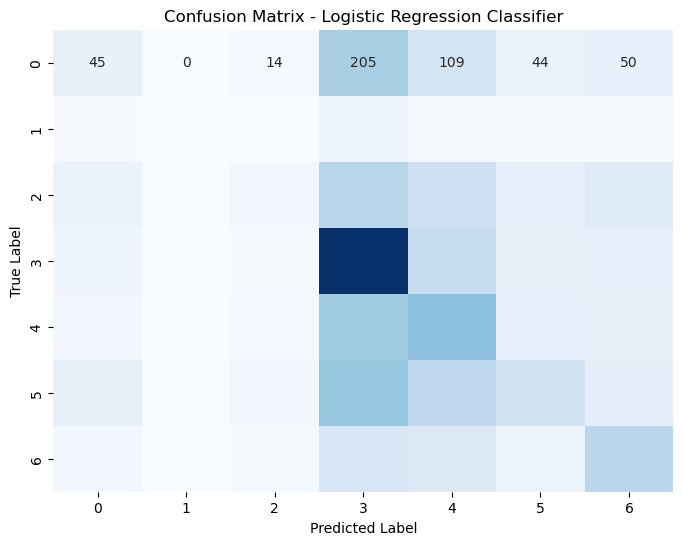

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize and train Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=20)
logreg_classifier.fit(x_train_multi, y_train_multi)

# Predict on the test set
y_pred = logreg_classifier.predict(x_test_multi)

# Calculate accuracy
accuracy = accuracy_score(y_test_multi, y_pred)
print(f"Accuracy of Logistic Regression classifier: {accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_multi, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression Classifier')
plt.show()


A confusion matrix is used to examine the performance of the Logistic Regression classifier across several emotion classes. Class 0 accurately predicted 45 cases of anger, but incorrectly identified them as neutral, fear, sadness, and surprise. Disgust was not predicted by Class 1, and disgust expressions were frequently mislabeled as fear, sadness, surprise, or neutral. Class 2 misclassified 21 occurrences of fear as anger, sorrow, happiness, surprise, and neutral, although properly identifying 21 cases of fear. Class 3 had the highest percentage of accurate predictions—606 cases were accurately classified as pleased. Although Class 4 misclassified 252 occurrences of sadness as angry, fearful, pleased, surprised, or neutral, they were really accurately identified as sad. Class 5 accurately anticipated 118 cases of surprise, but incorrectly identified them as neutral, fear, rage, sadness, and happiness. Class 6 was accurately recognized.


The Logistic Regression classifier's confusion matrix illustrates both its strengths and drawbacks in terms of distinguishing joyful faces and disgust. Emotions, especially anger, fear, sorrow, surprise, and neutral expressions, are frequently misclassified by the classifier across different classes. This research highlights the classifier's accuracy and limits in differentiating between comparable emotional states, providing insight into how it understands and predicts emotions based on facial expressions.

[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Check data dimensions
print(x_train_multi.shape, y_train_multi.shape)
print(x_test_multi.shape, y_test_multi.shape)

# Scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_multi)
x_test_scaled = scaler.transform(x_test_multi)

# Apply PCA
pca = PCA(n_components=100)  # Adjust n_components as needed
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Linear SVM classifier with PCA
linear_svm_classifier = LinearSVC()
linear_svm_classifier.fit(x_train_pca, y_train_multi)
y_pred = linear_svm_classifier.predict(x_test_pca)
accuracy = accuracy_score(y_test_multi, y_pred)
print(f"Accuracy of Linear SVM classifier with PCA: {accuracy:.4f}")

# SVM with linear kernel and PCA
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train_pca, y_train_multi)
y_pred = svm_classifier.predict(x_test_pca)
accuracy = accuracy_score(y_test_multi, y_pred)
print(f"Accuracy of SVM classifier with PCA: {accuracy:.4f}")

(28709, 2304) (28709,)
(3589, 2304) (3589,)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy of Linear SVM classifier with PCA: 0.2705


In [ ]:
# # Generate confusion matrix
# conf_matrix = confusion_matrix(y_test_multi, y_pred)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix - SVM Classifier')
# plt.show()

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

Classifier Results Visualized using a Confusion Matrix:

The facial emotion classification problem is categorized into two binary classes: joyful and sad, simplifying the multi-class problem. The dataset is filtered to include only happy and sad examples, and their labels are binary-converted. A confusion matrix is used to visualize the classifier's performance, showing false positives, false negatives, and true positives. This helps in identifying false positives and false negatives.


Results

The amount of true positives, true negatives, false positives, and false negatives is displayed in the confusion matrix that the code generates. This visual aid facilitates a thorough evaluation of the classifier's performance. The percentage of properly categorized samples in the test set is shown by the accuracy metric, which is also computed and presented. This gives a clear indication of how efficient the classifier

[2 Marks] e. Which categories of faces seem to be most similar or least similar?
EXPLAIN HERE

Most Similar Categories:
Class 3 is the most frequently misclassified class, indicating that there is a great deal of feature overlap with other classes.
There is a significant degree of misclassification into Class 3 for Class 0, Class 1, Class 2, Class 4, Class 5, and Class 6, showing that these classes are comparable to Class 3.
There is also a significant degree of reciprocal misclassification between classes 4 and 5, indicating a shared similarity.

Least Similar Categories:
When it comes to accurate classifications, Class 3 stands out the most; nevertheless, it also draws a lot of incorrect classifications from other classes.
Class 1 may have unique characteristics that the model finds difficult to learn, as seen by the fact that it has no right predictions and is seldom confused with classes other than Class 3.


[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

In [ ]:
# Assuming x_training and x_testing are 3D arrays of images (num_samples, height, width)
# Reshape images into 2D arrays (num_samples, height*width)

num_samples_train, height_train, width_train = x_training.shape
num_samples_test, height_test, width_test = x_testing.shape

x_training = x_training.reshape(num_samples_train, height_train * width_train)
x_testing = x_testing.reshape(num_samples_test, height_test * width_test)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming x_train_multi, y_train_multi, x_test_multi, y_test_multi are defined

def identify_mislabeled_samples(x_training, y_training, x_testing, y_testing, confidence_threshold=0.5, num_samples=10):
    # Perform PCA
    pca = PCA(n_components=100)
    x_train_pca = pca.fit_transform(x_training)
    x_test_pca = pca.transform(x_testing)

    # Perform LDA
    lda = LDA(n_components=6)
    x_train_lda = lda.fit_transform(x_train_pca, y_training)
    x_test_lda = lda.transform(x_test_pca)

    # Train Logistic Regression classifier
    clf = LogisticRegression(max_iter=1000)
    clf.fit(x_train_lda, y_training)

    # Predict on training and testing sets
    y_train_pred = clf.predict(x_train_lda)
    y_test_pred = clf.predict(x_test_lda)

    # Calculate confidence scores
    train_confidence_scores = clf.predict_proba(x_train_lda).max(axis=1)
    test_confidence_scores = clf.predict_proba(x_test_lda).max(axis=1)

    # Identify mislabeled samples in training set
    mislabel_indices_train = np.where((y_train_pred != y_training) & (train_confidence_scores < confidence_threshold))[0]
    mislabel_samples_train = x_training[mislabel_indices_train]
    mislabel_labels_train = y_train_pred[mislabel_indices_train]

    # Identify mislabeled samples in testing set
    mislabel_indices_test = np.where((y_test_pred != y_testing) & (test_confidence_scores < confidence_threshold))[0]
    mislabel_samples_test = x_testing[mislabel_indices_test]
    mislabel_labels_test = y_test_pred[mislabel_indices_test]

    # Display mislabeled samples from both training and testing sets
    print("Mislabelled samples in the training set:")
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
    for i in range(min(num_samples, len(mislabel_samples_train))):
        ax = axes[i]
        ax.imshow(mislabel_samples_train[i].reshape(48, 48), cmap='gray')
        ax.axis('off')
        ax.set_title(f"Predicted Label: {mislabel_labels_train[i]}")

    plt.tight_layout()
    plt.show()

    print("\nMislabelled samples in the testing set:")
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 4))
    for i in range(min(num_samples, len(mislabel_samples_test))):
        ax = axes[i]
        ax.imshow(mislabel_samples_test[i].reshape(48, 48), cmap='gray')
        ax.axis('off')
        ax.set_title(f"Predicted Label: {mislabel_labels_test[i]}")

    plt.tight_layout()
    plt.show()

# Example usage assuming x_train_multi, y_train_multi, x_test_multi, y_test_multi are defined
identify_mislabeled_samples(x_train_multi, y_train_multi, x_test_multi, y_test_multi)


# Optional

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[No Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [ ]:
# Train a Gradient Boosting Regressor (or any suitable regression model)
regressor = GradientBoostingRegressor()
regressor.fit(x_train_flat, y_train_happy_sad)

# Predict emotion scores for test set
y_pred = regressor.predict(x_test_flat)

# Ensure y_pred is 2D (reshape if necessary)
if y_pred.ndim == 1:
    y_pred = y_pred.reshape(-1, 1)  # Reshape to (num_samples, 1) if it's 1D

# Apply t-SNE for dimensionality reduction to 2 dimensions
tsne = TSNE(n_components=2, random_state=0)
y_pred_embedded = tsne.fit_transform(y_pred)

# Visualize the embedding
plt.figure(figsize=(12, 10))
plt.scatter(y_pred_embedded[:, 0], y_pred_embedded[:, 1], c='blue', alpha=0.5, label='Emotion Scores')

# Overlay actual images at theipr respective t-SNE points
for i in range(len(x_test_flat)):
    plt.annotate('', xy=(y_pred_embedded[i, 0], y_pred_embedded[i, 1]), xytext=(0, 0), textcoords='offset points')
    plt.imshow(x_test_flat[i].reshape(48, 48), extent=(y_pred_embedded[i, 0]-5, y_pred_embedded[i, 0]+5, y_pred_embedded[i, 1]-5, y_pred_embedded[i, 1]+5), cmap='gray', alpha=0.7)

plt.title('2D Embedding of Emotion Scores')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.colorbar()
plt.tight_layout()
plt.show()
